In [1]:
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Define the file path
file_path = '/content/drive/My Drive/Colab Notebooks/'

# Load the CSV files
subject_df = pd.read_csv(file_path + 'Subject.csv')
visit_df = pd.read_csv(file_path + 'Visit.csv')

# Merge the DataFrames on 'SubjectID', keeping all rows from visit_df
merged_df = pd.merge(visit_df, subject_df, on='SubjectID', how='left')

# Save the resulting DataFrame to a new CSV file in the specified file_path
merged_df.to_csv(file_path + 'Merged.csv', index=False)

print("Merging complete. The result is saved in 'Merged.csv' in your Google Drive.")


Mounted at /content/drive
Merging complete. The result is saved in 'Merged.csv' in your Google Drive.


In [2]:
import pandas as pd

# Remove rows where 'IR_IS_classification' is 'Unknown' and 'SubStudy' is 'Exercise'
filtered_df = merged_df[(merged_df['IR_IS_classification'] != 'Unknown') & (merged_df['SubStudy'] != 'Exercise')]

# Save the filtered DataFrame to a new CSV file in the specified file_path
filtered_df.to_csv(file_path + 'Filtered_Merged.csv', index=False)

print("Filtering complete. The result is saved in 'Filtered_Merged.csv' in your Google Drive.")



Filtering complete. The result is saved in 'Filtered_Merged.csv' in your Google Drive.


In [3]:
import pandas as pd


# Load gut_16s_abundance.txt
gut_16s_df = pd.read_csv(file_path + 'gut_16s_abundance.txt', sep='\t')

# Load metabolome_abundance.txt
metabolome_df = pd.read_csv(file_path + 'metabolome_abundance.txt', sep='\t')

# Load proteome_abundance.txt
proteome_df = pd.read_csv(file_path + 'proteome_abundance.txt', sep='\t')

# Load RNASeq_abundance.txt
rnaseq_df = pd.read_csv(file_path + 'RNAseq_abundance.txt', sep='\t')


In [ ]:
gut_16s_df

,SampleID,phylum_Actinobacteria,phylum_Bacteroidetes,phylum_Firmicutes,phylum_Proteobacteria,phylum_Verrucomicrobia,phylum_unclassified_Bacteria,class_Actinobacteria,class_Bacilli,class_Bacteroidia,...,genus_Veillonella,genus_unclassified_Bacteria,genus_unclassified_Clostridiales,genus_unclassified_Clostridiales_Incertae.Sedis.XIII,genus_unclassified_Coriobacteriaceae,genus_unclassified_Erysipelotrichaceae,genus_unclassified_Firmicutes,genus_unclassified_Lachnospiraceae,genus_unclassified_Porphyromonadaceae,genus_unclassified_Ruminococcaceae
0,ZOZOW1T-1010,0.000449,0.650866,0.225080,0.007364,0.015835,0.097431,0.000449,0.000138,0.650866,...,0.000000,0.097431,0.007883,0.000035,0.000415,0.002386,0.015697,0.027452,0.000000,0.074128
1,ZOZOW1T-1011,0.000176,0.730518,0.184808,0.003900,0.008186,0.070902,0.000176,0.000070,0.730518,...,0.000035,0.070902,0.008713,0.000141,0.000176,0.000808,0.008608,0.011805,0.000000,0.069215
2,ZOZOW1T-1012,0.000597,0.178364,0.796861,0.000358,0.002788,0.020911,0.000597,0.000119,0.178364,...,0.000080,0.020911,0.022903,0.000518,0.000398,0.001713,0.000876,0.018362,0.000000,0.615351
3,ZOZOW1T-1015,0.000058,0.740726,0.226516,0.005977,0.001207,0.024971,0.000058,0.000029,0.740726,...,0.000029,0.024971,0.013046,0.000086,0.000029,0.004109,0.007730,0.043849,0.000029,0.067096
4,ZOZOW1T-1021,0.001113,0.554580,0.364195,0.038358,0.000059,0.041286,0.001113,0.000059,0.554580,...,0.000410,0.041286,0.006208,0.000117,0.000176,0.000468,0.000996,0.132584,0.015753,0.044624
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
850,ZJTKAE3-2012,0.000333,0.618688,0.376535,0.004055,0.000333,0.000000,0.000333,0.001500,0.618688,...,0.000278,0.000000,0.001111,0.000111,0.000278,0.003333,0.000000,0.010666,0.579190,0.006222
851,ZJTKAE3-2013,0.000464,0.800232,0.171435,0.008732,0.000139,0.000418,0.000464,0.000139,0.800232,...,0.000046,0.000418,0.000697,0.000046,0.000464,0.001579,0.000000,0.009661,0.635764,0.021273
852,ZJTKAE3-2015,0.009662,0.532156,0.445728,0.010115,0.000151,0.000377,0.009662,0.000453,0.532156,...,0.000000,0.000377,0.001057,0.002415,0.007397,0.022418,0.000000,0.030571,0.018267,0.035854
853,ZJTKAE3-6011,0.002607,0.776424,0.204213,0.002080,0.013300,0.001318,0.002607,0.000293,0.774578,...,0.000000,0.001318,0.038903,0.003281,0.000205,0.018016,0.000029,0.009784,0.001728,0.021649


In [4]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

file_path = '/content/drive/My Drive/Colab Notebooks/'


# Function to handle missing data
def handle_missing_data(df):
    # Check for missing values
    missing_values = df.isnull().sum()
    if missing_values.any():
        print("Missing values detected. Handling missing data...")

        # Calculate mean for numeric columns only
        numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
        df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())

        # For non-numeric columns, you might want to handle differently
        # Example: Fill with mode for categorical columns
        # categorical_cols = df.select_dtypes(include=['object']).columns
        # df[categorical_cols] = df[categorical_cols].fillna(df[categorical_cols].mode().iloc[0])

    return df

# Function to remove duplicate entries
def remove_duplicates(df):
    # Check for duplicates
    duplicates = df.duplicated()
    if duplicates.any():
        print("Duplicate entries detected. Removing duplicates...")

        # Remove duplicate rows
        df.drop_duplicates(inplace=True)

    return df

# Function to normalize and scale data
def normalize_and_scale(df):
    # Select only numeric columns for normalization
    numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

    # Initialize scaler
    scaler = StandardScaler()

    # Normalize and scale numeric columns
    df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

    return df


# Apply data cleaning and normalization steps to each DataFrame
metabolome_df = handle_missing_data(metabolome_df)
proteome_df = handle_missing_data(proteome_df)
rnaseq_df = handle_missing_data(rnaseq_df)

metabolome_df = remove_duplicates(metabolome_df)
proteome_df = remove_duplicates(proteome_df)
rnaseq_df = remove_duplicates(rnaseq_df)

metabolome_df = normalize_and_scale(metabolome_df)
proteome_df = normalize_and_scale(proteome_df)
rnaseq_df = normalize_and_scale(rnaseq_df)

# Save normalized data back to files
metabolome_df.to_csv(file_path + 'metabolome_abundance_normalized.csv', index=False)
proteome_df.to_csv(file_path + 'proteome_abundance_normalized.csv', index=False)
rnaseq_df.to_csv(file_path + 'RNASeq_abundance_normalized.csv', index=False)


Missing values detected. Handling missing data...
Missing values detected. Handling missing data...


In [5]:
# Apply data cleaning and normalization steps to each DataFrame
gut_16s_df = handle_missing_data(gut_16s_df)

gut_16s_df = remove_duplicates(gut_16s_df)

gut_16s_df = normalize_and_scale(gut_16s_df)

In [6]:
import pandas as pd

file_path = '/content/drive/My Drive/Colab Notebooks/'


# Rename 'SampleID' to 'VisitID' in each dataset
metabolome_df.rename(columns={'SampleID': 'VisitID'}, inplace=True)
proteome_df.rename(columns={'SampleID': 'VisitID'}, inplace=True)
rnaseq_df.rename(columns={'SampleID': 'VisitID'}, inplace=True)

# Merge datasets with filtered_df based on 'VisitID'
metabolome_df = pd.merge(metabolome_df, filtered_df[['VisitID', 'SubjectID', 'IR_IS_classification']], on='VisitID', how='left')
proteome_df = pd.merge(proteome_df, filtered_df[['VisitID', 'SubjectID', 'IR_IS_classification']], on='VisitID', how='left')
rnaseq_df = pd.merge(rnaseq_df, filtered_df[['VisitID', 'SubjectID', 'IR_IS_classification']], on='VisitID', how='left')

# Save normalized data back to files
metabolome_df.to_csv(file_path + 'metabolome.csv', index=False)
proteome_df.to_csv(file_path + 'proteome.csv', index=False)
rnaseq_df.to_csv(file_path + 'RNASeq.csv', index=False)


In [7]:
# Rename 'SampleID' to 'VisitID' in each dataset
gut_16s_df.rename(columns={'SampleID': 'VisitID'}, inplace=True)

# Merge datasets with filtered_df based on 'VisitID'
gut_16s_df = pd.merge(gut_16s_df, filtered_df[['VisitID', 'SubjectID', 'IR_IS_classification']], on='VisitID', how='left')

# Save normalized data back to files
gut_16s_df.to_csv(file_path + 'microbioanalyst_file.csv', index=False)


In [8]:
import pandas as pd

# Columns to be removed
columns_to_remove = ['SubjectID']

# Remove specified columns
gut_16s_df = gut_16s_df.drop(columns=columns_to_remove)


# Save normalized data back to files
gut_16s_df.to_csv(file_path + 'microbioanalyst_file.csv', index=False)

gut_16s_df



,VisitID,phylum_Actinobacteria,phylum_Bacteroidetes,phylum_Firmicutes,phylum_Proteobacteria,phylum_Verrucomicrobia,phylum_unclassified_Bacteria,class_Actinobacteria,class_Bacilli,class_Bacteroidia,...,genus_unclassified_Bacteria,genus_unclassified_Clostridiales,genus_unclassified_Clostridiales_Incertae.Sedis.XIII,genus_unclassified_Coriobacteriaceae,genus_unclassified_Erysipelotrichaceae,genus_unclassified_Firmicutes,genus_unclassified_Lachnospiraceae,genus_unclassified_Porphyromonadaceae,genus_unclassified_Ruminococcaceae,IR_IS_classification
0,ZOZOW1T-1010,-0.315665,0.748430,-1.041868,-0.493588,0.330334,1.820414,-0.315665,-0.097117,0.758438,...,1.820414,-0.289435,-0.428527,-0.245266,-0.325652,1.139087,-0.802303,-0.161942,0.521234,NaN
1,ZOZOW1T-1011,-0.325530,1.162310,-1.272645,-0.554614,0.012505,1.090394,-0.325530,-0.099003,1.166019,...,1.090394,-0.271321,-0.292506,-0.332143,-0.535546,0.414992,-1.220687,-0.161942,0.423212,NaN
2,ZOZOW1T-1012,-0.310332,-1.706751,2.234661,-0.616997,-0.211804,-0.285198,-0.310332,-0.097639,-1.659370,...,-0.285198,0.038218,0.191895,-0.251289,-0.415183,-0.374761,-1.045362,-0.161942,11.319943,IS
3,ZOZOW1T-1015,-0.329788,1.215352,-1.033638,-0.518029,-0.277512,-0.173500,-0.329788,-0.100157,1.218253,...,-0.173500,-0.176815,-0.362274,-0.385519,-0.096348,0.325278,-0.363861,-0.161188,0.380927,IS
4,ZOZOW1T-1021,-0.291768,0.248113,-0.244684,0.052366,-0.325225,0.275456,-0.291768,-0.099328,0.265737,...,0.275456,-0.325985,-0.322570,-0.332139,-0.580730,-0.362579,2.008805,0.251893,-0.067439,IS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
850,ZJTKAE3-2012,-0.319850,0.581228,-0.173976,-0.551877,-0.313810,-0.860620,-0.319850,-0.059343,0.593781,...,-0.860620,-0.437163,-0.330297,-0.295068,-0.199586,-0.464269,-1.251147,15.053440,-0.833655,IR
851,ZJTKAE3-2013,-0.315124,1.524555,-1.349276,-0.469497,-0.321870,-0.849118,-0.315124,-0.097088,1.522749,...,-0.849118,-0.446202,-0.413376,-0.227263,-0.432951,-0.464269,-1.278023,16.539645,-0.533356,IR
852,ZJTKAE3-2015,0.016277,0.131596,0.222527,-0.445140,-0.321387,-0.850235,0.016277,-0.088389,0.150994,...,-0.850235,-0.438347,2.628431,2.290511,2.339727,-0.464269,-0.718919,0.317931,-0.242413,IR
853,ZJTKAE3-6011,-0.237916,1.400843,-1.161449,-0.586674,0.224981,-0.824346,-0.237916,-0.092827,1.391477,...,-0.824346,0.387259,3.739754,-0.321470,1.753998,-0.461276,-1.274722,-0.116538,-0.525853,IR


In [ ]:
gut_16s_df

,VisitID,phylum_Actinobacteria,phylum_Bacteroidetes,phylum_Firmicutes,phylum_Proteobacteria,phylum_Verrucomicrobia,phylum_unclassified_Bacteria,class_Actinobacteria,class_Bacilli,class_Bacteroidia,...,genus_unclassified_Bacteria,genus_unclassified_Clostridiales,genus_unclassified_Clostridiales_Incertae.Sedis.XIII,genus_unclassified_Coriobacteriaceae,genus_unclassified_Erysipelotrichaceae,genus_unclassified_Firmicutes,genus_unclassified_Lachnospiraceae,genus_unclassified_Porphyromonadaceae,genus_unclassified_Ruminococcaceae,IR_IS_classification
0,ZOZOW1T-1010,-0.315665,0.748430,-1.041868,-0.493588,0.330334,1.820414,-0.315665,-0.097117,0.758438,...,1.820414,-0.289435,-0.428527,-0.245266,-0.325652,1.139087,-0.802303,-0.161942,0.521234,NaN
1,ZOZOW1T-1011,-0.325530,1.162310,-1.272645,-0.554614,0.012505,1.090394,-0.325530,-0.099003,1.166019,...,1.090394,-0.271321,-0.292506,-0.332143,-0.535546,0.414992,-1.220687,-0.161942,0.423212,NaN
2,ZOZOW1T-1012,-0.310332,-1.706751,2.234661,-0.616997,-0.211804,-0.285198,-0.310332,-0.097639,-1.659370,...,-0.285198,0.038218,0.191895,-0.251289,-0.415183,-0.374761,-1.045362,-0.161942,11.319943,IS
3,ZOZOW1T-1015,-0.329788,1.215352,-1.033638,-0.518029,-0.277512,-0.173500,-0.329788,-0.100157,1.218253,...,-0.173500,-0.176815,-0.362274,-0.385519,-0.096348,0.325278,-0.363861,-0.161188,0.380927,IS
4,ZOZOW1T-1021,-0.291768,0.248113,-0.244684,0.052366,-0.325225,0.275456,-0.291768,-0.099328,0.265737,...,0.275456,-0.325985,-0.322570,-0.332139,-0.580730,-0.362579,2.008805,0.251893,-0.067439,IS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
850,ZJTKAE3-2012,-0.319850,0.581228,-0.173976,-0.551877,-0.313810,-0.860620,-0.319850,-0.059343,0.593781,...,-0.860620,-0.437163,-0.330297,-0.295068,-0.199586,-0.464269,-1.251147,15.053440,-0.833655,IR
851,ZJTKAE3-2013,-0.315124,1.524555,-1.349276,-0.469497,-0.321870,-0.849118,-0.315124,-0.097088,1.522749,...,-0.849118,-0.446202,-0.413376,-0.227263,-0.432951,-0.464269,-1.278023,16.539645,-0.533356,IR
852,ZJTKAE3-2015,0.016277,0.131596,0.222527,-0.445140,-0.321387,-0.850235,0.016277,-0.088389,0.150994,...,-0.850235,-0.438347,2.628431,2.290511,2.339727,-0.464269,-0.718919,0.317931,-0.242413,IR
853,ZJTKAE3-6011,-0.237916,1.400843,-1.161449,-0.586674,0.224981,-0.824346,-0.237916,-0.092827,1.391477,...,-0.824346,0.387259,3.739754,-0.321470,1.753998,-0.461276,-1.274722,-0.116538,-0.525853,IR


In [ ]:
metabolome_df

,VisitID,pHILIC_142.1225_1.3,pHILIC_199.0825_1.5,pHILIC_154.1225_1.6,pHILIC_302.3046_1.8,pHILIC_790.5707_2,pHILIC_257.1127_2,pHILIC_114.0661_2.5,pHILIC_776.5554_3,pHILIC_137.0457_3.1,...,nRPLC_151.04_2.3,nRPLC_203.002_1.9,nRPLC_117.0557_0.6,SubjectID_x,CL1,CL2,CL3,CL4,SubjectID_y,IR_IS_classification
0,ZOZOW1T-01,-0.691680,-0.615299,-0.848497,-0.699081,-0.063815,-1.875414,-2.923698,-0.334042,-0.738276,...,-0.388245,-1.068629,-1.440008,69-001,D0,UNK_I,Infection_Early,Infection,ZOZOW1T,IS
1,ZOZOW1T-02,-0.730138,-0.430467,-0.847618,-0.335189,-0.063811,-0.192498,-0.383827,-0.223404,-0.030005,...,0.033464,-0.427329,-0.676890,69-001,D4,UNK_II,Infection_Middle,Infection,ZOZOW1T,IS
2,ZOZOW1T-03,-0.716181,-0.512875,-0.848981,-1.054959,-0.063765,-1.981808,-2.754295,-0.366434,-0.239762,...,-0.370807,-0.898439,-1.280243,69-001,D21,UNK_III,Infection_Recovery_Early,Infection_L,ZOZOW1T,IS
3,ZOZOW1T-05,-0.702427,-0.606831,-0.848447,-1.127881,-0.063815,-1.678364,-2.086837,-0.396635,-0.339327,...,-0.369469,-0.929845,-1.380209,69-001,NaN,UNK_V,NaN,Healthy,ZOZOW1T,IS
4,ZOZOW1T-06,-0.678150,-0.540455,-0.848190,-1.402714,-0.063815,-2.056792,-3.073201,-0.408667,-0.839271,...,-0.377228,-0.963770,-1.410341,69-001,NaN,UNK_VI,NaN,Healthy,ZOZOW1T,IS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
976,ZJTKAE3-2014,1.111969,0.074988,1.079259,0.550178,-0.063145,-1.686338,-0.615346,-0.263848,0.042595,...,0.355718,-0.753726,-0.595041,70-1015,D7,flu?,Imz_Late,Imz,ZJTKAE3,IR
977,ZJTKAE3-2015,1.103153,-0.369490,0.803678,-0.192740,-0.063536,-1.307422,-0.851366,-0.291869,-1.110670,...,3.051700,-0.736645,-0.497439,70-1015,D22,flu?,Imz_Recovery_Early,Imz_L,ZJTKAE3,IR
978,ZJTKAE3-6011,-0.615194,-0.339453,-0.848063,-0.153830,-0.063755,0.240585,-0.539502,0.053909,0.021394,...,-0.223199,-0.601511,-0.869211,70-1015,NaN,NaN,NaN,Healthy,ZJTKAE3,IR
979,ZJTKAE3-6021,-0.727009,-0.514716,-0.848689,0.351067,-0.063365,-1.470971,-1.254491,-0.187587,-1.034200,...,-0.247247,-0.456415,-0.706303,70-1015,NaN,NaN,NaN,Healthy,ZJTKAE3,IR


In [9]:
import pandas as pd

# Columns to be removed
columns_to_remove = ['SubjectID_x',	'CL1',	'CL2',	'CL3',	'CL4']

# Remove specified columns
metabolome_df = metabolome_df.drop(columns=columns_to_remove)

# Rename the column
metabolome_df = metabolome_df.rename(columns={'SubjectID_y': 'SubjectID'})
metabolome_df = metabolome_df.rename(columns={'IR_IS_classification_y': 'IR_IS_classification'})


metabolome_df


,VisitID,pHILIC_142.1225_1.3,pHILIC_199.0825_1.5,pHILIC_154.1225_1.6,pHILIC_302.3046_1.8,pHILIC_790.5707_2,pHILIC_257.1127_2,pHILIC_114.0661_2.5,pHILIC_776.5554_3,pHILIC_137.0457_3.1,...,nRPLC_183.1025_5.1,nRPLC_155.0713_3.6,nRPLC_411.127_3.6,nRPLC_206.0821_3.4,nRPLC_188.0352_3.1,nRPLC_151.04_2.3,nRPLC_203.002_1.9,nRPLC_117.0557_0.6,SubjectID,IR_IS_classification
0,ZOZOW1T-01,-0.691680,-0.615299,-0.848497,-0.699081,-0.063815,-1.875414,-2.923698,-0.334042,-0.738276,...,-0.626999,-0.937506,-2.641355,-2.259689,-2.024439,-0.388245,-1.068629,-1.440008,ZOZOW1T,IS
1,ZOZOW1T-02,-0.730138,-0.430467,-0.847618,-0.335189,-0.063811,-0.192498,-0.383827,-0.223404,-0.030005,...,3.510122,-0.722073,-0.373339,-1.339387,-0.448768,0.033464,-0.427329,-0.676890,ZOZOW1T,IS
2,ZOZOW1T-03,-0.716181,-0.512875,-0.848981,-1.054959,-0.063765,-1.981808,-2.754295,-0.366434,-0.239762,...,-0.842618,-0.941147,-2.401689,-2.014275,-1.824848,-0.370807,-0.898439,-1.280243,ZOZOW1T,IS
3,ZOZOW1T-05,-0.702427,-0.606831,-0.848447,-1.127881,-0.063815,-1.678364,-2.086837,-0.396635,-0.339327,...,-0.756407,-0.906476,-2.347945,-1.382924,-1.772263,-0.369469,-0.929845,-1.380209,ZOZOW1T,IS
4,ZOZOW1T-06,-0.678150,-0.540455,-0.848190,-1.402714,-0.063815,-2.056792,-3.073201,-0.408667,-0.839271,...,-0.761755,-0.784298,-2.623541,-1.653538,-2.084720,-0.377228,-0.963770,-1.410341,ZOZOW1T,IS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
976,ZJTKAE3-2014,1.111969,0.074988,1.079259,0.550178,-0.063145,-1.686338,-0.615346,-0.263848,0.042595,...,-0.196631,-0.343395,-0.868551,-1.217019,-0.597758,0.355718,-0.753726,-0.595041,ZJTKAE3,IR
977,ZJTKAE3-2015,1.103153,-0.369490,0.803678,-0.192740,-0.063536,-1.307422,-0.851366,-0.291869,-1.110670,...,-0.004181,-0.107320,-0.817227,-1.207906,-0.408921,3.051700,-0.736645,-0.497439,ZJTKAE3,IR
978,ZJTKAE3-6011,-0.615194,-0.339453,-0.848063,-0.153830,-0.063755,0.240585,-0.539502,0.053909,0.021394,...,-0.435768,-0.365569,-0.871266,-1.170638,-0.682394,-0.223199,-0.601511,-0.869211,ZJTKAE3,IR
979,ZJTKAE3-6021,-0.727009,-0.514716,-0.848689,0.351067,-0.063365,-1.470971,-1.254491,-0.187587,-1.034200,...,-0.704321,-0.430569,-1.100368,-0.770556,-0.201789,-0.247247,-0.456415,-0.706303,ZJTKAE3,IR


In [ ]:
metabolome_df.to_csv(file_path + 'metaboanalyst_file.csv', index=False)


In [ ]:
proteome_df

,VisitID,IGLL5,MASP2,APOL1,CEP290,CD5L,FCN3,ATRN,ATRN.1,APOM,...,FCGBP,ZNF10,FAM161B,SubjectID_x,CL1,CL2,CL3,CL4,SubjectID_y,IR_IS_classification
0,ZOZOW1T-1013,0.152776,0.249634,0.312562,0.069664,-0.736317,0.876294,0.200211,-1.610173,0.900008,...,0.158807,0.432556,-0.046984,69-001,D7,NaN,Infection_Late,Infection,ZOZOW1T,IS
1,ZOZOW1T-1015,0.667347,-1.313655,0.699058,1.640368,-1.223197,0.038363,1.654792,-0.464960,1.290003,...,-1.782914,-0.822196,-0.520821,69-001,D30,NaN,Infection_Recovery_Late,Infection_L,ZOZOW1T,IS
2,ZOZOW1T-1021,0.243941,0.201166,0.210130,-0.639572,0.347792,0.455320,0.431055,-0.299515,1.171146,...,0.323018,2.747638,-0.851534,69-001,D1,NaN,Infection_Early,Infection,ZOZOW1T,IS
3,ZOZOW1T-1022,-1.406230,0.125496,0.008346,-1.470394,2.004828,0.009501,-0.114342,0.925401,1.572721,...,0.112240,-0.023470,-2.041889,69-001,D3,NaN,Infection_Middle,Infection,ZOZOW1T,IS
4,ZOZOW1T-1023,-1.436223,0.351339,-0.414417,0.059243,-0.699173,0.411351,0.424026,0.571946,-0.574865,...,0.063714,-0.117909,-0.149048,69-001,D15,NaN,Infection_Recovery_Early,Infection_L,ZOZOW1T,IS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
945,ZJTKAE3-2012,-0.146254,0.215541,0.108401,0.194981,-0.231977,0.075465,0.118395,0.133129,0.760504,...,-0.375753,-0.618298,0.567584,70-1015,D1,flu?,Imz_Early,Imz,ZJTKAE3,IR
946,ZJTKAE3-2013,-0.229264,0.398131,-1.278060,-0.471235,-0.021219,0.056447,0.001280,-0.180218,0.454765,...,-1.718853,0.730474,-0.463544,70-1015,D4,flu?,Imz_Middle,Imz,ZJTKAE3,IR
947,ZJTKAE3-2015,-1.756283,-1.591304,0.544829,0.694909,-0.032745,-0.212343,-0.392765,-0.132394,1.821316,...,0.500888,-0.934126,-1.199484,70-1015,D22,flu?,Imz_Recovery_Early,Imz_L,ZJTKAE3,IR
948,ZJTKAE3-6021,3.007703,-0.059674,-1.749163,0.834982,-0.425518,1.638788,-0.121075,-2.287477,1.521795,...,-0.427405,0.803343,-1.664828,70-1015,NaN,NaN,NaN,Healthy,ZJTKAE3,IR


In [ ]:
proteome_df.to_csv(file_path + 'proteoanalyst_file.csv', index=False)


In [ ]:
import pandas as pd

# Columns to be removed
columns_to_remove = ['SubjectID_x',	'CL1',	'CL2',	'CL3',	'CL4']

# Remove specified columns
proteome_df = proteome_df.drop(columns=columns_to_remove)

# Rename the column
proteome_df = proteome_df.rename(columns={'SubjectID_y': 'SubjectID'})

proteome_df

,VisitID,IGLL5,MASP2,APOL1,CEP290,CD5L,FCN3,ATRN,ATRN.1,APOM,...,MAN2B2,ATP11B,TLN1,AFG3L2,LYVE1,FCGBP,ZNF10,FAM161B,SubjectID,IR_IS_classification
0,ZOZOW1T-1013,0.152776,0.249634,0.312562,0.069664,-0.736317,0.876294,0.200211,-1.610173,0.900008,...,-0.579366,2.116812,1.285359,0.326318,0.616543,0.158807,0.432556,-0.046984,ZOZOW1T,IS
1,ZOZOW1T-1015,0.667347,-1.313655,0.699058,1.640368,-1.223197,0.038363,1.654792,-0.464960,1.290003,...,-1.837939,0.354063,-0.726376,1.773711,-0.481892,-1.782914,-0.822196,-0.520821,ZOZOW1T,IS
2,ZOZOW1T-1021,0.243941,0.201166,0.210130,-0.639572,0.347792,0.455320,0.431055,-0.299515,1.171146,...,0.237118,0.921659,1.290044,-0.144747,1.070715,0.323018,2.747638,-0.851534,ZOZOW1T,IS
3,ZOZOW1T-1022,-1.406230,0.125496,0.008346,-1.470394,2.004828,0.009501,-0.114342,0.925401,1.572721,...,-1.337732,1.088795,0.741839,0.021800,0.750922,0.112240,-0.023470,-2.041889,ZOZOW1T,IS
4,ZOZOW1T-1023,-1.436223,0.351339,-0.414417,0.059243,-0.699173,0.411351,0.424026,0.571946,-0.574865,...,1.512805,-3.526460,-0.636771,0.109867,0.611585,0.063714,-0.117909,-0.149048,ZOZOW1T,IS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
945,ZJTKAE3-2012,-0.146254,0.215541,0.108401,0.194981,-0.231977,0.075465,0.118395,0.133129,0.760504,...,-0.769026,-0.037714,0.023004,0.876928,0.194385,-0.375753,-0.618298,0.567584,ZJTKAE3,IR
946,ZJTKAE3-2013,-0.229264,0.398131,-1.278060,-0.471235,-0.021219,0.056447,0.001280,-0.180218,0.454765,...,0.435713,0.032464,1.063105,-0.674031,-0.022237,-1.718853,0.730474,-0.463544,ZJTKAE3,IR
947,ZJTKAE3-2015,-1.756283,-1.591304,0.544829,0.694909,-0.032745,-0.212343,-0.392765,-0.132394,1.821316,...,0.046970,0.895283,1.537545,0.518623,0.822096,0.500888,-0.934126,-1.199484,ZJTKAE3,IR
948,ZJTKAE3-6021,3.007703,-0.059674,-1.749163,0.834982,-0.425518,1.638788,-0.121075,-2.287477,1.521795,...,1.257833,2.418677,0.839946,0.433185,-1.653399,-0.427405,0.803343,-1.664828,ZJTKAE3,IR


In [ ]:
rnaseq_df

,VisitID,A1BG,A1BG-AS1,A1CF,A2M,A2M-AS1,A2ML1,A2MP1,AAED1,AAGAB,...,ZSWIM8,ZSWIM8-AS1,ZXDA,ZXDB,ZXDC,ZYX,ZZEF1,ZZZ3,SubjectID,IR_IS_classification
0,ZOZOW1T-02,-0.116741,-2.012406,-0.179983,0.381593,-0.431865,0.728672,0.384696,0.486732,-0.421624,...,0.547925,0.488447,-0.049957,-0.048417,-0.599724,-0.295346,-0.807493,0.185817,ZOZOW1T,IS
1,ZOZOW1T-04,-0.676464,-0.209056,0.078474,0.395327,-0.431865,-0.007588,0.445631,-0.510372,0.166242,...,0.388415,0.045773,-0.136851,0.455943,-0.599724,0.305071,0.473132,0.458339,ZOZOW1T,IS
2,ZOZOW1T-1013,0.071314,0.393897,-1.519982,0.408128,-0.431865,0.366947,0.185745,0.402132,-1.333518,...,-0.321701,-0.080274,0.969288,-1.066438,-0.599724,-0.093938,-0.807493,-0.401182,ZOZOW1T,IS
3,ZOZOW1T-1015,0.439349,-0.466203,-0.149456,0.881831,-0.431865,0.765555,1.003444,0.131871,0.909086,...,1.117672,-0.043542,-1.125730,-1.066438,-0.599724,0.470078,-0.807493,0.218005,ZOZOW1T,IS
4,ZOZOW1T-1021,0.231691,-0.276541,-1.519982,-0.108688,-0.431865,0.667958,-0.467659,0.310716,-2.109237,...,-1.353752,0.030098,0.142097,-1.066438,-0.599724,-2.018991,-0.807493,-0.190472,ZOZOW1T,IS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
876,ZJTKAE3-2013,0.385140,-1.141768,0.786844,-0.836172,0.546308,1.212938,-0.830977,0.677530,-0.518533,...,-0.608889,0.742112,0.945648,0.464220,-0.599724,1.210748,-0.189221,-0.413389,ZJTKAE3,IR
877,ZJTKAE3-2014,1.117064,0.493536,0.401980,0.943094,-0.431865,2.115109,1.006967,-0.284378,-0.205862,...,0.612267,0.234434,0.137099,-1.066438,-0.599724,-1.028502,-0.807493,-0.194559,ZJTKAE3,IR
878,ZJTKAE3-2015,-0.913934,-0.468246,1.674205,0.243718,-0.431865,0.580414,0.139867,1.289264,-0.499838,...,0.199590,-0.325360,-0.316918,-0.301047,-0.599724,0.467686,0.033477,-0.565783,ZJTKAE3,IR
879,ZJTKAE3-6021,0.362265,2.160699,1.905759,2.091170,-0.431865,1.345395,2.092934,1.950671,1.553954,...,2.232725,0.678384,1.284162,-1.066438,-0.599724,-0.128813,-0.807493,-1.227102,ZJTKAE3,IR


In [ ]:
rnaseq_df.to_csv(file_path + 'rnaseqanalyst_file.csv', index=False)


In [10]:
import pandas as pd

# Descriptive Statistics for RNA-seq Data (excluding identifier and label columns)
rnaseq_features = rnaseq_df.drop(columns=['VisitID', 'SubjectID', 'IR_IS_classification'])
print("RNA-seq Data Descriptive Statistics:")
print(rnaseq_features.describe())


RNA-seq Data Descriptive Statistics:
               A1BG      A1BG-AS1          A1CF           A2M       A2M-AS1  \
count  8.810000e+02  8.810000e+02  8.810000e+02  8.810000e+02  8.810000e+02   
mean   6.452147e-17  2.016296e-17 -4.032592e-17  1.532385e-16 -5.645629e-17   
std    1.000568e+00  1.000568e+00  1.000568e+00  1.000568e+00  1.000568e+00   
min   -4.291120e+00 -2.012406e+00 -1.519982e+00 -6.609685e+00 -4.318647e-01   
25%   -4.655943e-01 -5.341102e-01 -6.216793e-01 -5.019407e-01 -4.318647e-01   
50%    1.479452e-01  9.041243e-02  2.938906e-02  1.905325e-01 -4.318647e-01   
75%    6.134691e-01  6.556638e-01  6.170896e-01  6.440729e-01  9.765214e-02   
max    2.731901e+00  5.545799e+00  4.595260e+00  2.104329e+00  8.409120e+00   

              A2ML1         A2MP1         AAED1         AAGAB          AAK1  \
count  8.810000e+02  8.810000e+02  8.810000e+02  8.810000e+02  8.810000e+02   
mean   1.149289e-16 -2.701837e-16  2.621185e-17  2.419555e-17 -8.065184e-17   
std    1.00056

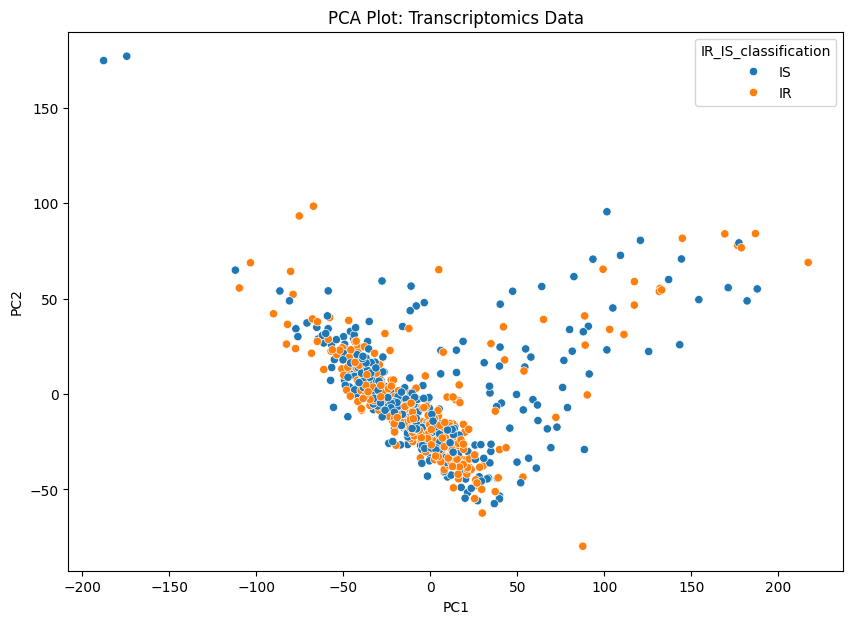

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

# PCA Plot for RNA-seq Data
pca = PCA(n_components=2)
components_rnaseq = pca.fit_transform(rnaseq_features)

pca_rnaseq_df = pd.DataFrame(data=components_rnaseq, columns=['PC1', 'PC2'])
pca_rnaseq_df['IR_IS_classification'] = rnaseq_df['IR_IS_classification']

plt.figure(figsize=(10, 7))
sns.scatterplot(x='PC1', y='PC2', hue='IR_IS_classification', data=pca_rnaseq_df)
plt.title('PCA Plot: Transcriptomics Data')
plt.show()


<ipython-input-21-9ac532e2638e>:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax1 = sns.boxplot(x='IR_IS_classification', y='PC1', data=pca_rnaseq_df, palette="Set2")
<ipython-input-21-9ac532e2638e>:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax2 = sns.boxplot(x='IR_IS_classification', y='PC2', data=pca_rnaseq_df, palette="Set2")


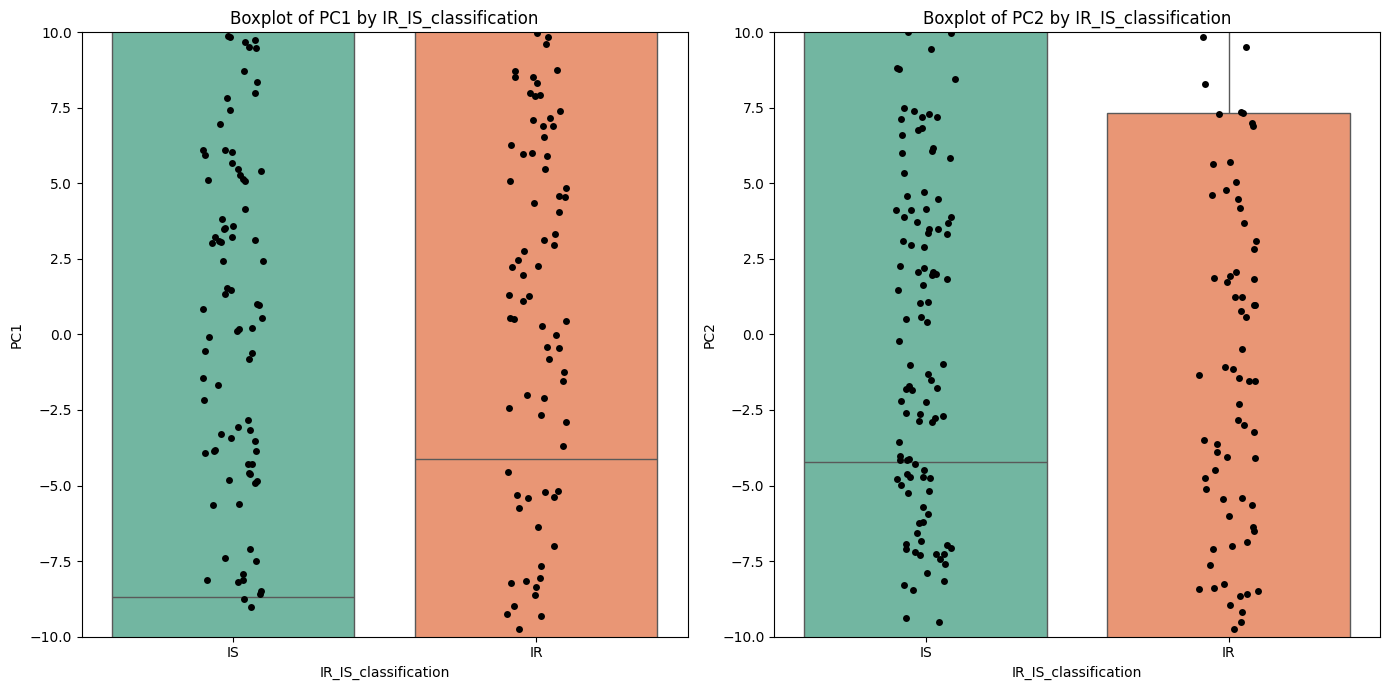

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.decomposition import PCA
import scipy.stats as stats
import numpy as np

# Assume rnaseq_features and rnaseq_df are already defined
# PCA transformation
pca = PCA(n_components=2)
components_rnaseq = pca.fit_transform(rnaseq_features)

# Create a DataFrame with the PCA results
pca_rnaseq_df = pd.DataFrame(data=components_rnaseq, columns=['PC1', 'PC2'])
pca_rnaseq_df['IR_IS_classification'] = rnaseq_df['IR_IS_classification']

# Function to add statistical annotations
def add_stat_annotation(ax, data, x, y, hue, **kwargs):
    unique_classes = data[x].unique()
    class_combinations = [(unique_classes[i], unique_classes[j]) for i in range(len(unique_classes)) for j in range(i+1, len(unique_classes))]
    for comb in class_combinations:
        group1 = data[data[x] == comb[0]][y]
        group2 = data[data[x] == comb[1]][y]
        _, p_value = stats.ttest_ind(group1, group2)
        y_max = max(np.max(group1), np.max(group2))
        ax.annotate(f'p={p_value:.2e}', xy=((unique_classes.tolist().index(comb[0]) + unique_classes.tolist().index(comb[1]))/2, y_max), ha='center')

# Set up the figure
plt.figure(figsize=(14, 7))

# Boxplot for PC1
plt.subplot(1, 2, 1)
ax1 = sns.boxplot(x='IR_IS_classification', y='PC1', data=pca_rnaseq_df, palette="Set2")
sns.stripplot(x='IR_IS_classification', y='PC1', data=pca_rnaseq_df, color='black', size=5, jitter=True, ax=ax1)
add_stat_annotation(ax1, pca_rnaseq_df, 'IR_IS_classification', 'PC1', 'IR_IS_classification')
plt.title('Boxplot of PC1 by IR_IS_classification')
plt.xlabel('IR_IS_classification')
plt.ylabel('PC1')
plt.ylim([-10, 10])

# Boxplot for PC2
plt.subplot(1, 2, 2)
ax2 = sns.boxplot(x='IR_IS_classification', y='PC2', data=pca_rnaseq_df, palette="Set2")
sns.stripplot(x='IR_IS_classification', y='PC2', data=pca_rnaseq_df, color='black', size=5, jitter=True, ax=ax2)
add_stat_annotation(ax2, pca_rnaseq_df, 'IR_IS_classification', 'PC2', 'IR_IS_classification')
plt.title('Boxplot of PC2 by IR_IS_classification')
plt.xlabel('IR_IS_classification')
plt.ylabel('PC2')
plt.ylim([-10, 10])

# Display the plots
plt.tight_layout()
plt.show()


<ipython-input-22-c7ac644d2a24>:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax1 = sns.boxplot(x='IR_IS_classification', y='PC1', data=pca_rnaseq_df, palette="Set2")
<ipython-input-22-c7ac644d2a24>:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax2 = sns.boxplot(x='IR_IS_classification', y='PC2', data=pca_rnaseq_df, palette="Set2")


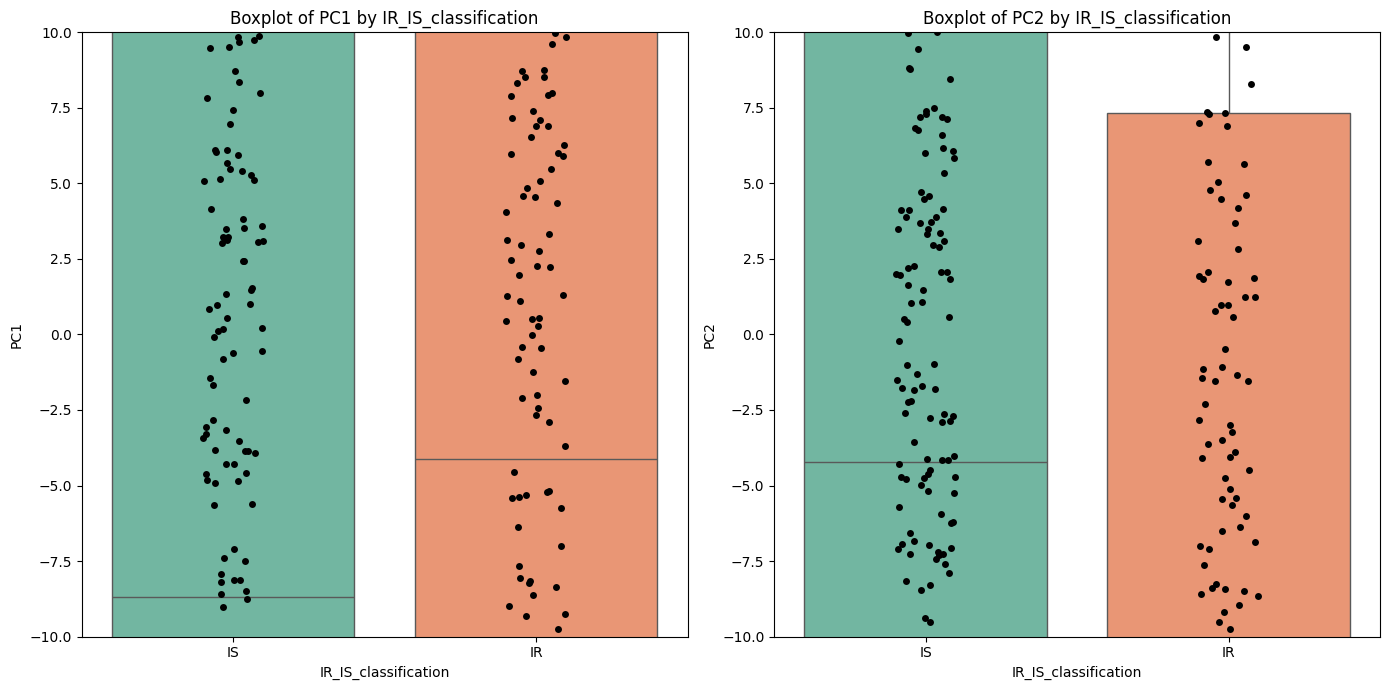

         PC1        PC2       VisitID IR_IS_classification
0   4.157153 -13.589238    ZOZOW1T-02                   IS
1   3.237387 -15.659474    ZOZOW1T-04                   IS
2 -20.748928 -14.318702  ZOZOW1T-1013                   IS
3   9.850420 -43.447946  ZOZOW1T-1015                   IS
4 -46.464771   3.720864  ZOZOW1T-1021                   IS


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.decomposition import PCA
import scipy.stats as stats
import numpy as np

# Assuming rnaseq_features and rnaseq_df are already defined and contain VisitID
# PCA transformation
pca = PCA(n_components=2)
components_rnaseq = pca.fit_transform(rnaseq_features)

# Create a DataFrame with the PCA results
pca_rnaseq_df = pd.DataFrame(data=components_rnaseq, columns=['PC1', 'PC2'])

# Add the VisitID and IR_IS_classification to the PCA DataFrame
pca_rnaseq_df['VisitID'] = rnaseq_df['VisitID']
pca_rnaseq_df['IR_IS_classification'] = rnaseq_df['IR_IS_classification']

# Function to add statistical annotations
def add_stat_annotation(ax, data, x, y, hue, **kwargs):
    unique_classes = data[x].unique()
    class_combinations = [(unique_classes[i], unique_classes[j]) for i in range(len(unique_classes)) for j in range(i+1, len(unique_classes))]
    for comb in class_combinations:
        group1 = data[data[x] == comb[0]][y]
        group2 = data[data[x] == comb[1]][y]
        _, p_value = stats.ttest_ind(group1, group2)
        y_max = max(np.max(group1), np.max(group2))
        ax.annotate(f'p={p_value:.2e}', xy=((unique_classes.tolist().index(comb[0]) + unique_classes.tolist().index(comb[1]))/2, y_max), ha='center')

# Set up the figure
plt.figure(figsize=(14, 7))

# Boxplot for PC1
plt.subplot(1, 2, 1)
ax1 = sns.boxplot(x='IR_IS_classification', y='PC1', data=pca_rnaseq_df, palette="Set2")
sns.stripplot(x='IR_IS_classification', y='PC1', data=pca_rnaseq_df, color='black', size=5, jitter=True, ax=ax1)
add_stat_annotation(ax1, pca_rnaseq_df, 'IR_IS_classification', 'PC1', 'IR_IS_classification')
plt.title('Boxplot of PC1 by IR_IS_classification')
plt.xlabel('IR_IS_classification')
plt.ylabel('PC1')
plt.ylim([-10, 10])

# Boxplot for PC2
plt.subplot(1, 2, 2)
ax2 = sns.boxplot(x='IR_IS_classification', y='PC2', data=pca_rnaseq_df, palette="Set2")
sns.stripplot(x='IR_IS_classification', y='PC2', data=pca_rnaseq_df, color='black', size=5, jitter=True, ax=ax2)
add_stat_annotation(ax2, pca_rnaseq_df, 'IR_IS_classification', 'PC2', 'IR_IS_classification')
plt.title('Boxplot of PC2 by IR_IS_classification')
plt.xlabel('IR_IS_classification')
plt.ylabel('PC2')
plt.ylim([-10, 10])

# Display the plots
plt.tight_layout()
plt.show()

# Now you can use pca_rnaseq_df for further analysis, including biomarker detection
print(pca_rnaseq_df.head())


In [ ]:
import pandas as pd
from sklearn.decomposition import PCA

# Assuming `rnaseq_features` is your input data (e.g., gene expression data)
# Perform PCA
pca = PCA(n_components=2)  # Adjust number of components as needed
components_rnaseq = pca.fit_transform(rnaseq_features)

# Calculate PCA loadings (which are the weights)
loadings = pd.DataFrame(pca.components_.T, columns=['PC1', 'PC2'], index=rnaseq_features.columns)

# Get the top 250 features contributing to PC1
top_250_features_pc1 = loadings['PC1'].abs().sort_values(ascending=False).head(250)

# Get the top 250 features contributing to PC2
top_250_features_pc2 = loadings['PC2'].abs().sort_values(ascending=False).head(250)

# Combine the results into a single DataFrame, aligning on the index (feature names)
top_features_combined = pd.concat([top_250_features_pc1, top_250_features_pc2], axis=1)
top_features_combined.columns = ['PC1', 'PC2']

# Optional: Fill NaNs with 0 if needed
top_features_combined = top_features_combined.fillna(0)

# Save the combined DataFrame to a CSV file
top_features_combined.to_csv(file_path + 'top_250_features_RNAseq.csv', index=True)

print("Top 250 features contributing to PC1 and PC2 have been saved to 'top_250_features_RNAseq.csv'.")


Top 250 features contributing to PC1 and PC2 have been saved to 'top_250_features_RNAseq.csv'.


In [ ]:
import numpy as np
import pandas as pd
import scipy

print("NumPy version:", np.__version__)
print("Pandas version:", pd.__version__)
print("SciPy version:", scipy.__version__)


NumPy version: 1.26.4
Pandas version: 2.1.4
SciPy version: 1.13.1


In [ ]:
import numpy as np
import pandas as pd
from scipy import stats

# Assume rnaseq_features and rnaseq_df are already defined

# Extract the two groups
group1 = rnaseq_df[rnaseq_df['IR_IS_classification'] == 'IR'][rnaseq_features.columns]
group2 = rnaseq_df[rnaseq_df['IR_IS_classification'] == 'IS'][rnaseq_features.columns]

# Perform t-test across all features (columns) at once
t_stat, p_values = stats.ttest_ind(group1, group2, axis=0)

# Convert to DataFrame for better readability
significant_features_df = pd.DataFrame({
    'Feature': rnaseq_features.columns,
    'p-value': p_values
})

# Filter for significant features with p-value < 0.05
significant_features_df = significant_features_df[significant_features_df['p-value'] < 0.05]

# Sort by p-value
significant_features_df = significant_features_df.sort_values(by='p-value')

print("Significant features (biomarkers):")
print(significant_features_df)

# Save the combined DataFrame to a CSV file
significant_features_df.to_csv(file_path +'RNAseq Significant features (biomarkers).csv', index=True)



Significant features (biomarkers):
          Feature       p-value
10072         ZFY  3.975540e-10
9418         TSIX  1.640290e-09
6837   POM121L10P  1.344697e-08
2044      CXorf36  6.352800e-08
9103     TMEM150C  1.304268e-07
...           ...           ...
449         APOL2  4.980188e-02
3338        GNA11  4.987027e-02
1926        CRLF1  4.991330e-02
3897        IFI30  4.993393e-02
4327        KIF2C  4.999921e-02

[1578 rows x 2 columns]


<ipython-input-28-99539f04a8d5>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(pca_rnaseq_df, x='PC1', y='IR_IS_classification', inner='box', palette='Dark2')


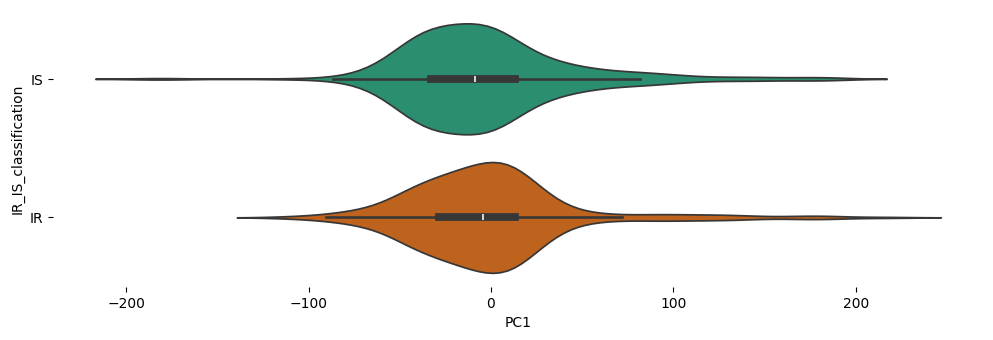

In [ ]:
# @title IR_IS_classification vs PC1

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(pca_rnaseq_df['IR_IS_classification'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(pca_rnaseq_df, x='PC1', y='IR_IS_classification', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

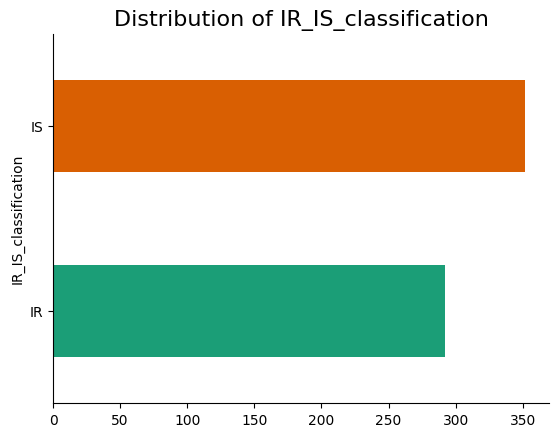

In [ ]:
# @title IR_IS_classification

from matplotlib import pyplot as plt
import seaborn as sns

# Create a horizontal bar plot for the IR_IS_classification counts
pca_rnaseq_df.groupby('IR_IS_classification').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))

# Customize the plot
plt.gca().spines[['top', 'right']].set_visible(False)

# Add a title
plt.title('Distribution of IR_IS_classification', fontsize=16)

# Display the plot
plt.show()


In [ ]:
import pandas as pd

# Descriptive Statistics for Metabolomics Data (excluding identifier and label columns)
metabolome_features = metabolome_df.drop(columns=['VisitID', 'SubjectID', 'IR_IS_classification'])
print("Metabolomics Data Descriptive Statistics:")
print(metabolome_features.describe())


Metabolomics Data Descriptive Statistics:
       pHILIC_142.1225_1.3  pHILIC_199.0825_1.5  pHILIC_154.1225_1.6  \
count         9.810000e+02         9.810000e+02         9.810000e+02   
mean         -1.448609e-17         1.448609e-17         2.897218e-17   
std           1.000510e+00         1.000510e+00         1.000510e+00   
min          -8.725285e-01        -6.661167e-01        -8.521209e-01   
25%          -7.270088e-01        -4.977197e-01        -8.479105e-01   
50%          -3.150532e-01        -3.147267e-01        -1.854701e-01   
75%           5.294196e-01         7.806506e-02         6.274288e-01   
max           1.038946e+01         1.289226e+01         4.857353e+00   

       pHILIC_302.3046_1.8  pHILIC_790.5707_2  pHILIC_257.1127_2  \
count         9.810000e+02       9.810000e+02       9.810000e+02   
mean         -2.127645e-16       7.243045e-18      -1.158887e-16   
std           1.000510e+00       1.000510e+00       1.000510e+00   
min          -1.777901e+00      -6.38

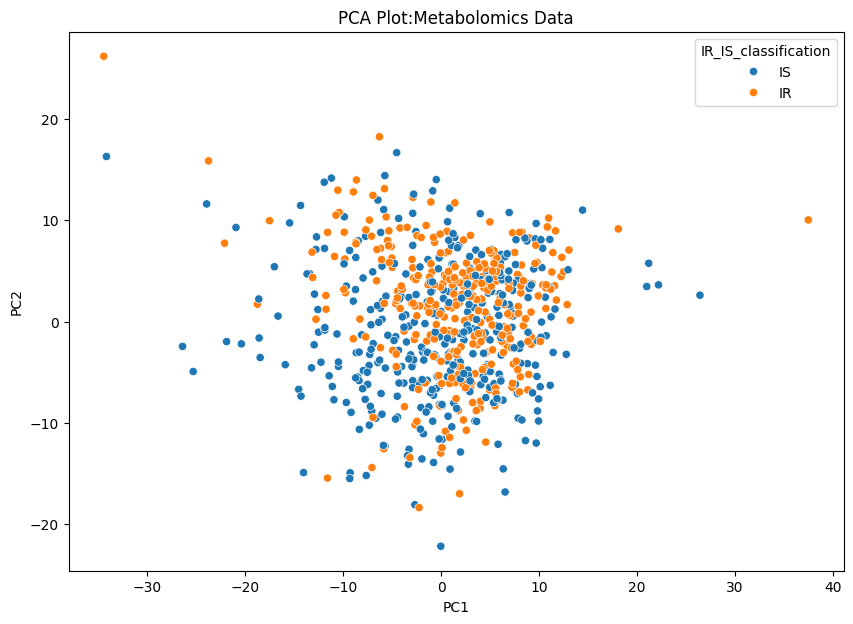

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

# PCA Plot for RNA-seq Data
pca = PCA(n_components=2)
components_metabolome = pca.fit_transform(metabolome_features)

pca_metabolome_df = pd.DataFrame(data=components_metabolome, columns=['PC1', 'PC2'])
pca_metabolome_df['IR_IS_classification'] = proteome_df['IR_IS_classification']

plt.figure(figsize=(10, 7))
sns.scatterplot(x='PC1', y='PC2', hue='IR_IS_classification', data=pca_metabolome_df)
plt.title('PCA Plot:Metabolomics Data')
plt.show()


In [ ]:
import numpy as np
import pandas as pd
from scipy import stats

# Extract the two groups
group1 = metabolome_df[metabolome_df['IR_IS_classification'] == 'IR'][metabolome_features.columns]
group2 = metabolome_df[metabolome_df['IR_IS_classification'] == 'IS'][metabolome_features.columns]

# Perform t-test across all features (columns) at once
t_stat, p_values = stats.ttest_ind(group1, group2, axis=0)

# Convert to DataFrame for better readability
significant_features_df = pd.DataFrame({
    'Feature': metabolome_features.columns,
    'p-value': p_values
})

# Filter for significant features with p-value < 0.05
significant_features_df = significant_features_df[significant_features_df['p-value'] < 0.05]

# Sort by p-value
significant_features_df = significant_features_df.sort_values(by='p-value')

print("Significant features (biomarkers):")
print(significant_features_df)
# Save the combined DataFrame to a CSV file

significant_features_df.to_csv(file_path + 'Metabolomics Significant features (biomarkers).csv', index=True)

Significant features (biomarkers):
                 Feature       p-value
543   nRPLC_343.2853_9.8  6.467869e-36
648   nRPLC_315.2539_9.7  6.459241e-35
327   pRPLC_244.1544_1.7  2.961735e-34
6    pHILIC_114.0661_2.5  5.506656e-26
720   nRPLC_188.0352_3.1  4.102187e-25
..                   ...           ...
110  pHILIC_189.1233_8.4  4.423117e-02
409   pRPLC_454.2927_9.9  4.445989e-02
423  pRPLC_482.3238_10.5  4.448132e-02
280  nHILIC_528.2633_6.7  4.594594e-02
325   pRPLC_295.1292_1.3  4.606768e-02

[380 rows x 2 columns]


In [ ]:
import pandas as pd
from sklearn.decomposition import PCA

# Assuming `metabolome_features` is your input data (e.g., gene expression data)
# Perform PCA
pca = PCA(n_components=2)  # Adjust number of components as needed
components_metabolome = pca.fit_transform(metabolome_features)

# Calculate PCA loadings (which are the weights)
loadings = pd.DataFrame(pca.components_.T, columns=['PC1', 'PC2'], index=metabolome_features.columns)

# Get the top 50 features contributing to PC1
top_50_features_pc1 = loadings['PC1'].abs().sort_values(ascending=False).head(50)

# Get the top 250 features contributing to PC2
top_50_features_pc2 = loadings['PC2'].abs().sort_values(ascending=False).head(50)

# Combine the results into a single DataFrame, aligning on the index (feature names)
top_features_combined = pd.concat([top_50_features_pc1, top_50_features_pc2], axis=1)
top_features_combined.columns = ['PC1', 'PC2']

# Optional: Fill NaNs with 0 if needed
top_features_combined = top_features_combined.fillna(0)

# Save the combined DataFrame to a CSV file
top_features_combined.to_csv(file_path + 'top_50_features_metabolom.csv', index=True)

print("Top 50 features contributing to PC1 and PC2 have been saved to 'top_50_features_metabolom.csv'.")

# Save the combined DataFrame to a CSV file
significant_features_df.to_csv(file_path +'Metabolomics Significant features (biomarkers).csv', index=True)

Top 50 features contributing to PC1 and PC2 have been saved to 'top_50_features_metabolom.csv'.


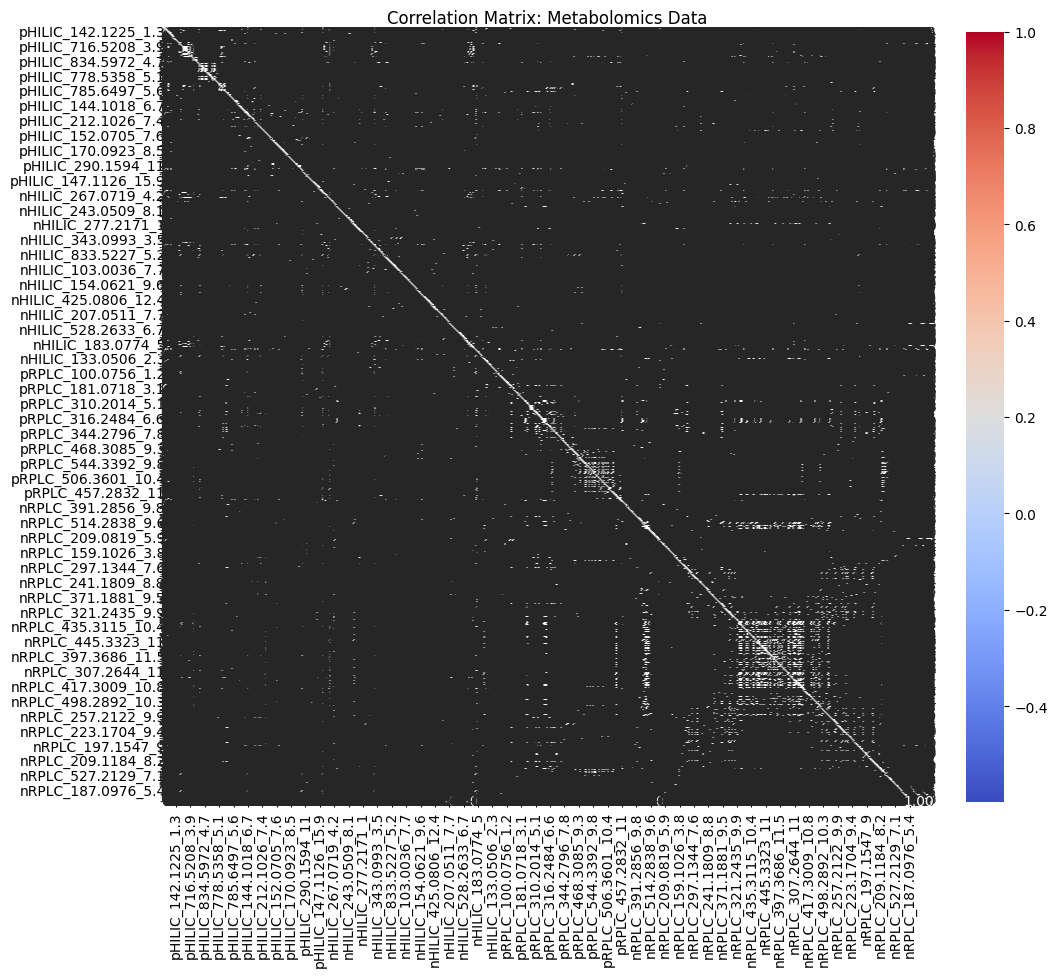

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

# Calculate the correlation matrix
correlation_matrix = metabolome_features.corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', cbar=True)
plt.title('Correlation Matrix: Metabolomics Data')
plt.show()



In [ ]:
import pandas as pd

# Descriptive Statistics for Proteomics Data (excluding identifier and label columns)
proteome_features = proteome_df.drop(columns=['VisitID', 'SubjectID', 'IR_IS_classification'])
print("Proteomics Data Descriptive Statistics:")
print(proteome_features.describe())


Proteomics Data Descriptive Statistics:
              IGLL5         MASP2         APOL1        CEP290          CD5L  \
count  9.500000e+02  9.500000e+02  9.500000e+02  9.500000e+02  9.500000e+02   
mean   1.458482e-16  2.879568e-16  8.227337e-17  1.645467e-16 -4.487638e-17   
std    1.000527e+00  1.000527e+00  1.000527e+00  1.000527e+00  1.000527e+00   
min   -4.524514e+00 -3.710301e+00 -9.433168e+00 -3.975713e+00 -3.482844e+00   
25%   -4.354269e-01 -5.507195e-01 -6.103482e-01 -7.932354e-01 -5.712085e-01   
50%   -9.571854e-03  9.282705e-02  1.213935e-01  1.517083e-01 -8.150577e-02   
75%    4.884601e-01  6.973045e-01  6.456554e-01  6.631554e-01  4.980297e-01   
max    3.504428e+00  2.680863e+00  2.722674e+00  3.450282e+00  4.231914e+00   

               FCN3          ATRN        ATRN.1          APOM            CP  \
count  9.500000e+02  9.500000e+02  9.500000e+02  9.500000e+02  9.500000e+02   
mean  -1.290196e-16  1.570673e-16  3.590111e-16 -2.991759e-16 -1.391168e-15   
std    1.00

In [ ]:
import numpy as np
import pandas as pd
from scipy import stats

# Extract the two groups
group1 = proteome_df[proteome_df['IR_IS_classification'] == 'IR'][proteome_features.columns]
group2 = proteome_df[proteome_df['IR_IS_classification'] == 'IS'][proteome_features.columns]

# Perform t-test across all features (columns) at once
t_stat, p_values = stats.ttest_ind(group1, group2, axis=0)

# Convert to DataFrame for better readability
significant_features_df = pd.DataFrame({
    'Feature': proteome_features.columns,
    'p-value': p_values
})

# Filter for significant features with p-value < 0.05
significant_features_df = significant_features_df[significant_features_df['p-value'] < 0.05]

# Sort by p-value
significant_features_df = significant_features_df.sort_values(by='p-value')

print("Significant features (biomarkers):")
print(significant_features_df)
# Save the combined DataFrame to a CSV file

significant_features_df.to_csv(file_path + 'Proteomics Significant features (biomarkers).csv', index=True)




Significant features (biomarkers):
     Feature       p-value
154      LPA  7.866122e-18
125     APOD  1.927538e-16
71      IGHM  9.395979e-15
228    APOC4  7.817615e-12
63   HV307_2  2.585421e-11
..       ...           ...
195     CPN2  4.116185e-02
80     APOC2  4.310635e-02
181     CPN1  4.387355e-02
188    ITIH1  4.533043e-02
26       AGT  4.851108e-02

[112 rows x 2 columns]


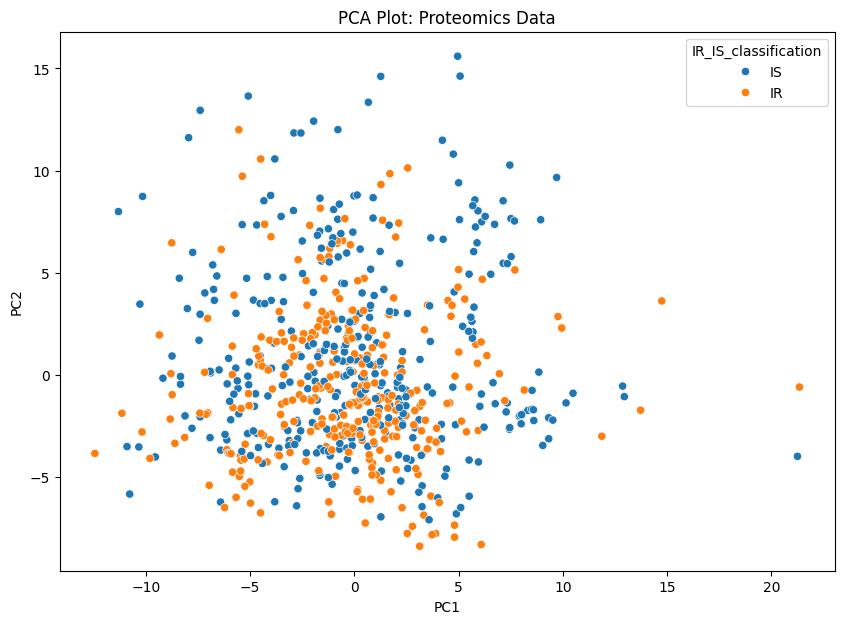

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

# PCA Plot for RNA-seq Data
pca = PCA(n_components=2)
components_proteome = pca.fit_transform(proteome_features)

pca_proteome_df = pd.DataFrame(data=components_proteome, columns=['PC1', 'PC2'])
pca_proteome_df['IR_IS_classification'] = proteome_df['IR_IS_classification']

plt.figure(figsize=(10, 7))
sns.scatterplot(x='PC1', y='PC2', hue='IR_IS_classification', data=pca_proteome_df)
plt.title('PCA Plot: Proteomics Data')
plt.show()

In [ ]:
import pandas as pd
from sklearn.decomposition import PCA

# Assuming `proteome_features` is your input data (e.g., gene expression data)
# Perform PCA
pca = PCA(n_components=2)  # Adjust number of components as needed
components_proteome = pca.fit_transform(proteome_features)

# Calculate PCA loadings (which are the weights)
loadings = pd.DataFrame(pca.components_.T, columns=['PC1', 'PC2'], index=proteome_features.columns)

# Get the top 50 features contributing to PC1
top_20_features_pc1 = loadings['PC1'].abs().sort_values(ascending=False).head(20)

# Get the top 250 features contributing to PC2
top_20_features_pc2 = loadings['PC2'].abs().sort_values(ascending=False).head(20)

# Combine the results into a single DataFrame, aligning on the index (feature names)
top_features_combined = pd.concat([top_50_features_pc1, top_20_features_pc2], axis=1)
top_features_combined.columns = ['PC1', 'PC2']

# Optional: Fill NaNs with 0 if needed
top_features_combined = top_features_combined.fillna(0)

# Save the combined DataFrame to a CSV file
top_features_combined.to_csv(file_path +'top_20_features_proteome.csv', index=True)

print("Top 50 features contributing to PC1 and PC2 have been saved to 'top_20_features_proteome.csv'.")

Top 50 features contributing to PC1 and PC2 have been saved to 'top_20_features_proteome.csv'.


In [ ]:
gut_16s_df

,VisitID,phylum_Actinobacteria,phylum_Bacteroidetes,phylum_Firmicutes,phylum_Proteobacteria,phylum_Verrucomicrobia,phylum_unclassified_Bacteria,class_Actinobacteria,class_Bacilli,class_Bacteroidia,...,genus_unclassified_Bacteria,genus_unclassified_Clostridiales,genus_unclassified_Clostridiales_Incertae.Sedis.XIII,genus_unclassified_Coriobacteriaceae,genus_unclassified_Erysipelotrichaceae,genus_unclassified_Firmicutes,genus_unclassified_Lachnospiraceae,genus_unclassified_Porphyromonadaceae,genus_unclassified_Ruminococcaceae,IR_IS_classification
0,ZOZOW1T-1010,-0.315665,0.748430,-1.041868,-0.493588,0.330334,1.820414,-0.315665,-0.097117,0.758438,...,1.820414,-0.289435,-0.428527,-0.245266,-0.325652,1.139087,-0.802303,-0.161942,0.521234,NaN
1,ZOZOW1T-1011,-0.325530,1.162310,-1.272645,-0.554614,0.012505,1.090394,-0.325530,-0.099003,1.166019,...,1.090394,-0.271321,-0.292506,-0.332143,-0.535546,0.414992,-1.220687,-0.161942,0.423212,NaN
2,ZOZOW1T-1012,-0.310332,-1.706751,2.234661,-0.616997,-0.211804,-0.285198,-0.310332,-0.097639,-1.659370,...,-0.285198,0.038218,0.191895,-0.251289,-0.415183,-0.374761,-1.045362,-0.161942,11.319943,IS
3,ZOZOW1T-1015,-0.329788,1.215352,-1.033638,-0.518029,-0.277512,-0.173500,-0.329788,-0.100157,1.218253,...,-0.173500,-0.176815,-0.362274,-0.385519,-0.096348,0.325278,-0.363861,-0.161188,0.380927,IS
4,ZOZOW1T-1021,-0.291768,0.248113,-0.244684,0.052366,-0.325225,0.275456,-0.291768,-0.099328,0.265737,...,0.275456,-0.325985,-0.322570,-0.332139,-0.580730,-0.362579,2.008805,0.251893,-0.067439,IS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
850,ZJTKAE3-2012,-0.319850,0.581228,-0.173976,-0.551877,-0.313810,-0.860620,-0.319850,-0.059343,0.593781,...,-0.860620,-0.437163,-0.330297,-0.295068,-0.199586,-0.464269,-1.251147,15.053440,-0.833655,IR
851,ZJTKAE3-2013,-0.315124,1.524555,-1.349276,-0.469497,-0.321870,-0.849118,-0.315124,-0.097088,1.522749,...,-0.849118,-0.446202,-0.413376,-0.227263,-0.432951,-0.464269,-1.278023,16.539645,-0.533356,IR
852,ZJTKAE3-2015,0.016277,0.131596,0.222527,-0.445140,-0.321387,-0.850235,0.016277,-0.088389,0.150994,...,-0.850235,-0.438347,2.628431,2.290511,2.339727,-0.464269,-0.718919,0.317931,-0.242413,IR
853,ZJTKAE3-6011,-0.237916,1.400843,-1.161449,-0.586674,0.224981,-0.824346,-0.237916,-0.092827,1.391477,...,-0.824346,0.387259,3.739754,-0.321470,1.753998,-0.461276,-1.274722,-0.116538,-0.525853,IR


In [ ]:
import pandas as pd

microbiomics_df = gut_16s_df
# Descriptive Statistics for Microbiomics Data (excluding identifier and label columns)
microbiomics_features = microbiomics_df.drop(columns=['VisitID', 'IR_IS_classification'])
print("Microbiomics Data Descriptive Statistics:")
print(microbiomics_features.describe())

Microbiomics Data Descriptive Statistics:
       phylum_Actinobacteria  phylum_Bacteroidetes  phylum_Firmicutes  \
count           8.550000e+02          8.550000e+02       8.550000e+02   
mean           -9.972530e-17          4.321430e-16       2.804774e-17   
std             1.000585e+00          1.000585e+00       1.000585e+00   
min            -3.318602e-01         -2.632010e+00      -2.245195e+00   
25%            -2.980304e-01         -6.350711e-01      -7.193649e-01   
50%            -2.395801e-01          3.500192e-02      -6.633963e-02   
75%            -6.644280e-02          7.324386e-01       6.044071e-01   
max             1.617051e+01          2.478895e+00       3.393263e+00   

       phylum_Proteobacteria  phylum_Verrucomicrobia  \
count           8.550000e+02            8.550000e+02   
mean           -7.063875e-17           -8.310441e-18   
std             1.000585e+00            1.000585e+00   
min            -6.233119e-01           -3.276604e-01   
25%            -5.05

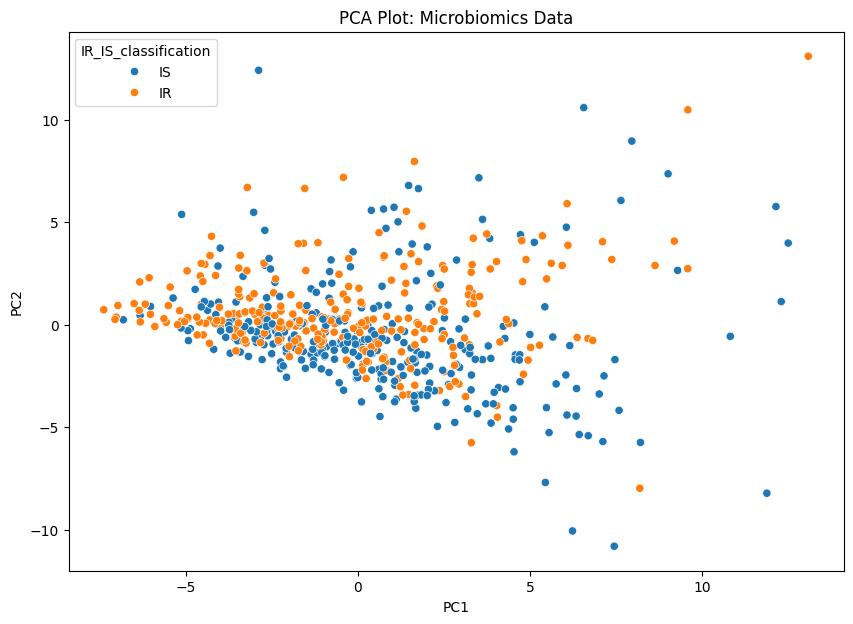

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

# PCA Plot for RNA-seq Data
pca = PCA(n_components=2)
components_microbiome = pca.fit_transform(microbiomics_features)

pca_microbiomics_df = pd.DataFrame(data=components_microbiome, columns=['PC1', 'PC2'])
pca_microbiomics_df['IR_IS_classification'] = microbiomics_df['IR_IS_classification']

plt.figure(figsize=(10, 7))
sns.scatterplot(x='PC1', y='PC2', hue='IR_IS_classification', data=pca_microbiomics_df)
plt.title('PCA Plot: Microbiomics Data')
plt.show()

In [ ]:
import numpy as np
import pandas as pd
from scipy import stats

# Extract the two groups
group1 = microbiomics_df[microbiomics_df['IR_IS_classification'] == 'IR'][microbiomics_features.columns]
group2 = microbiomics_df[microbiomics_df['IR_IS_classification'] == 'IS'][microbiomics_features.columns]

# Perform t-test across all features (columns) at once
t_stat, p_values = stats.ttest_ind(group1, group2, axis=0)

# Convert to DataFrame for better readability
significant_features_df = pd.DataFrame({
    'Feature': microbiomics_features.columns,
    'p-value': p_values
})

# Filter for significant features with p-value < 0.05
significant_features_df = significant_features_df[significant_features_df['p-value'] < 0.05]

# Sort by p-value
significant_features_df = significant_features_df.sort_values(by='p-value')

print("Significant features (biomarkers):")
print(significant_features_df)
# Save the combined DataFrame to a CSV file

significant_features_df.to_csv(file_path + 'Microbiomics Significant features (biomarkers).csv', index=True)

Significant features (biomarkers):
                                     Feature       p-value
5               phylum_unclassified_Bacteria  1.267079e-11
48              family_unclassified_Bacteria  1.267079e-11
28               order_unclassified_Bacteria  1.267079e-11
16               class_unclassified_Bacteria  1.267079e-11
87               genus_unclassified_Bacteria  1.267079e-11
76                         genus_Odoribacter  1.067424e-08
84                        genus_Ruminococcus  2.569973e-08
93        genus_unclassified_Lachnospiraceae  6.807326e-08
58                             genus_Blautia  3.767005e-07
65                    genus_Clostridium.XlVb  7.244992e-07
49         family_unclassified_Clostridiales  1.022296e-06
88          genus_unclassified_Clostridiales  1.022296e-06
75       genus_Lachnospiracea_incertae_sedis  7.979510e-05
32                   family_Clostridiaceae.1  9.821124e-05
66           genus_Clostridium.sensu.stricto  1.003339e-04
82                gen

In [ ]:
import pandas as pd
from sklearn.decomposition import PCA

# Assuming `microbiomics_features` is your input data (e.g., gene expression data)
# Perform PCA
pca = PCA(n_components=2)  # Adjust number of components as needed
components_microbiomics = pca.fit_transform(microbiomics_features)

# Calculate PCA loadings (which are the weights)
loadings = pd.DataFrame(pca.components_.T, columns=['PC1', 'PC2'], index=microbiomics_features.columns)

# Get the top 50 features contributing to PC1
top_10_features_pc1 = loadings['PC1'].abs().sort_values(ascending=False).head(10)

# Get the top 250 features contributing to PC2
top_10_features_pc2 = loadings['PC2'].abs().sort_values(ascending=False).head(10)

# Combine the results into a single DataFrame, aligning on the index (feature names)
top_features_combined = pd.concat([top_10_features_pc1, top_10_features_pc2], axis=1)
top_features_combined.columns = ['PC1', 'PC2']

# Optional: Fill NaNs with 0 if needed
top_features_combined = top_features_combined.fillna(0)

# Save the combined DataFrame to a CSV file
top_features_combined.to_csv(file_path + 'top_10_features_microbiomics.csv', index=True)

print("Top 10 features contributing to PC1 and PC2 have been saved to 'top_10_features_microbiomics.csv'.")

Top 10 features contributing to PC1 and PC2 have been saved to 'top_10_features_microbiomics.csv'.
